In [1]:
!pip install kaggle

In [2]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
!cp kaggle.json ~/.kaggle

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle  datasets download -d paultimothymooney/chest-xray-pneumonia

chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
!unzip /content/chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [7]:
import os

In [8]:
os.listdir('/content/chest_xray/train')

['NORMAL', 'PNEUMONIA']

In [9]:
os.listdir('/content/chest_xray/test')

['NORMAL', 'PNEUMONIA']

In [10]:
os.listdir('/content/chest_xray/val')

['NORMAL', 'PNEUMONIA']

In [11]:
import PIL

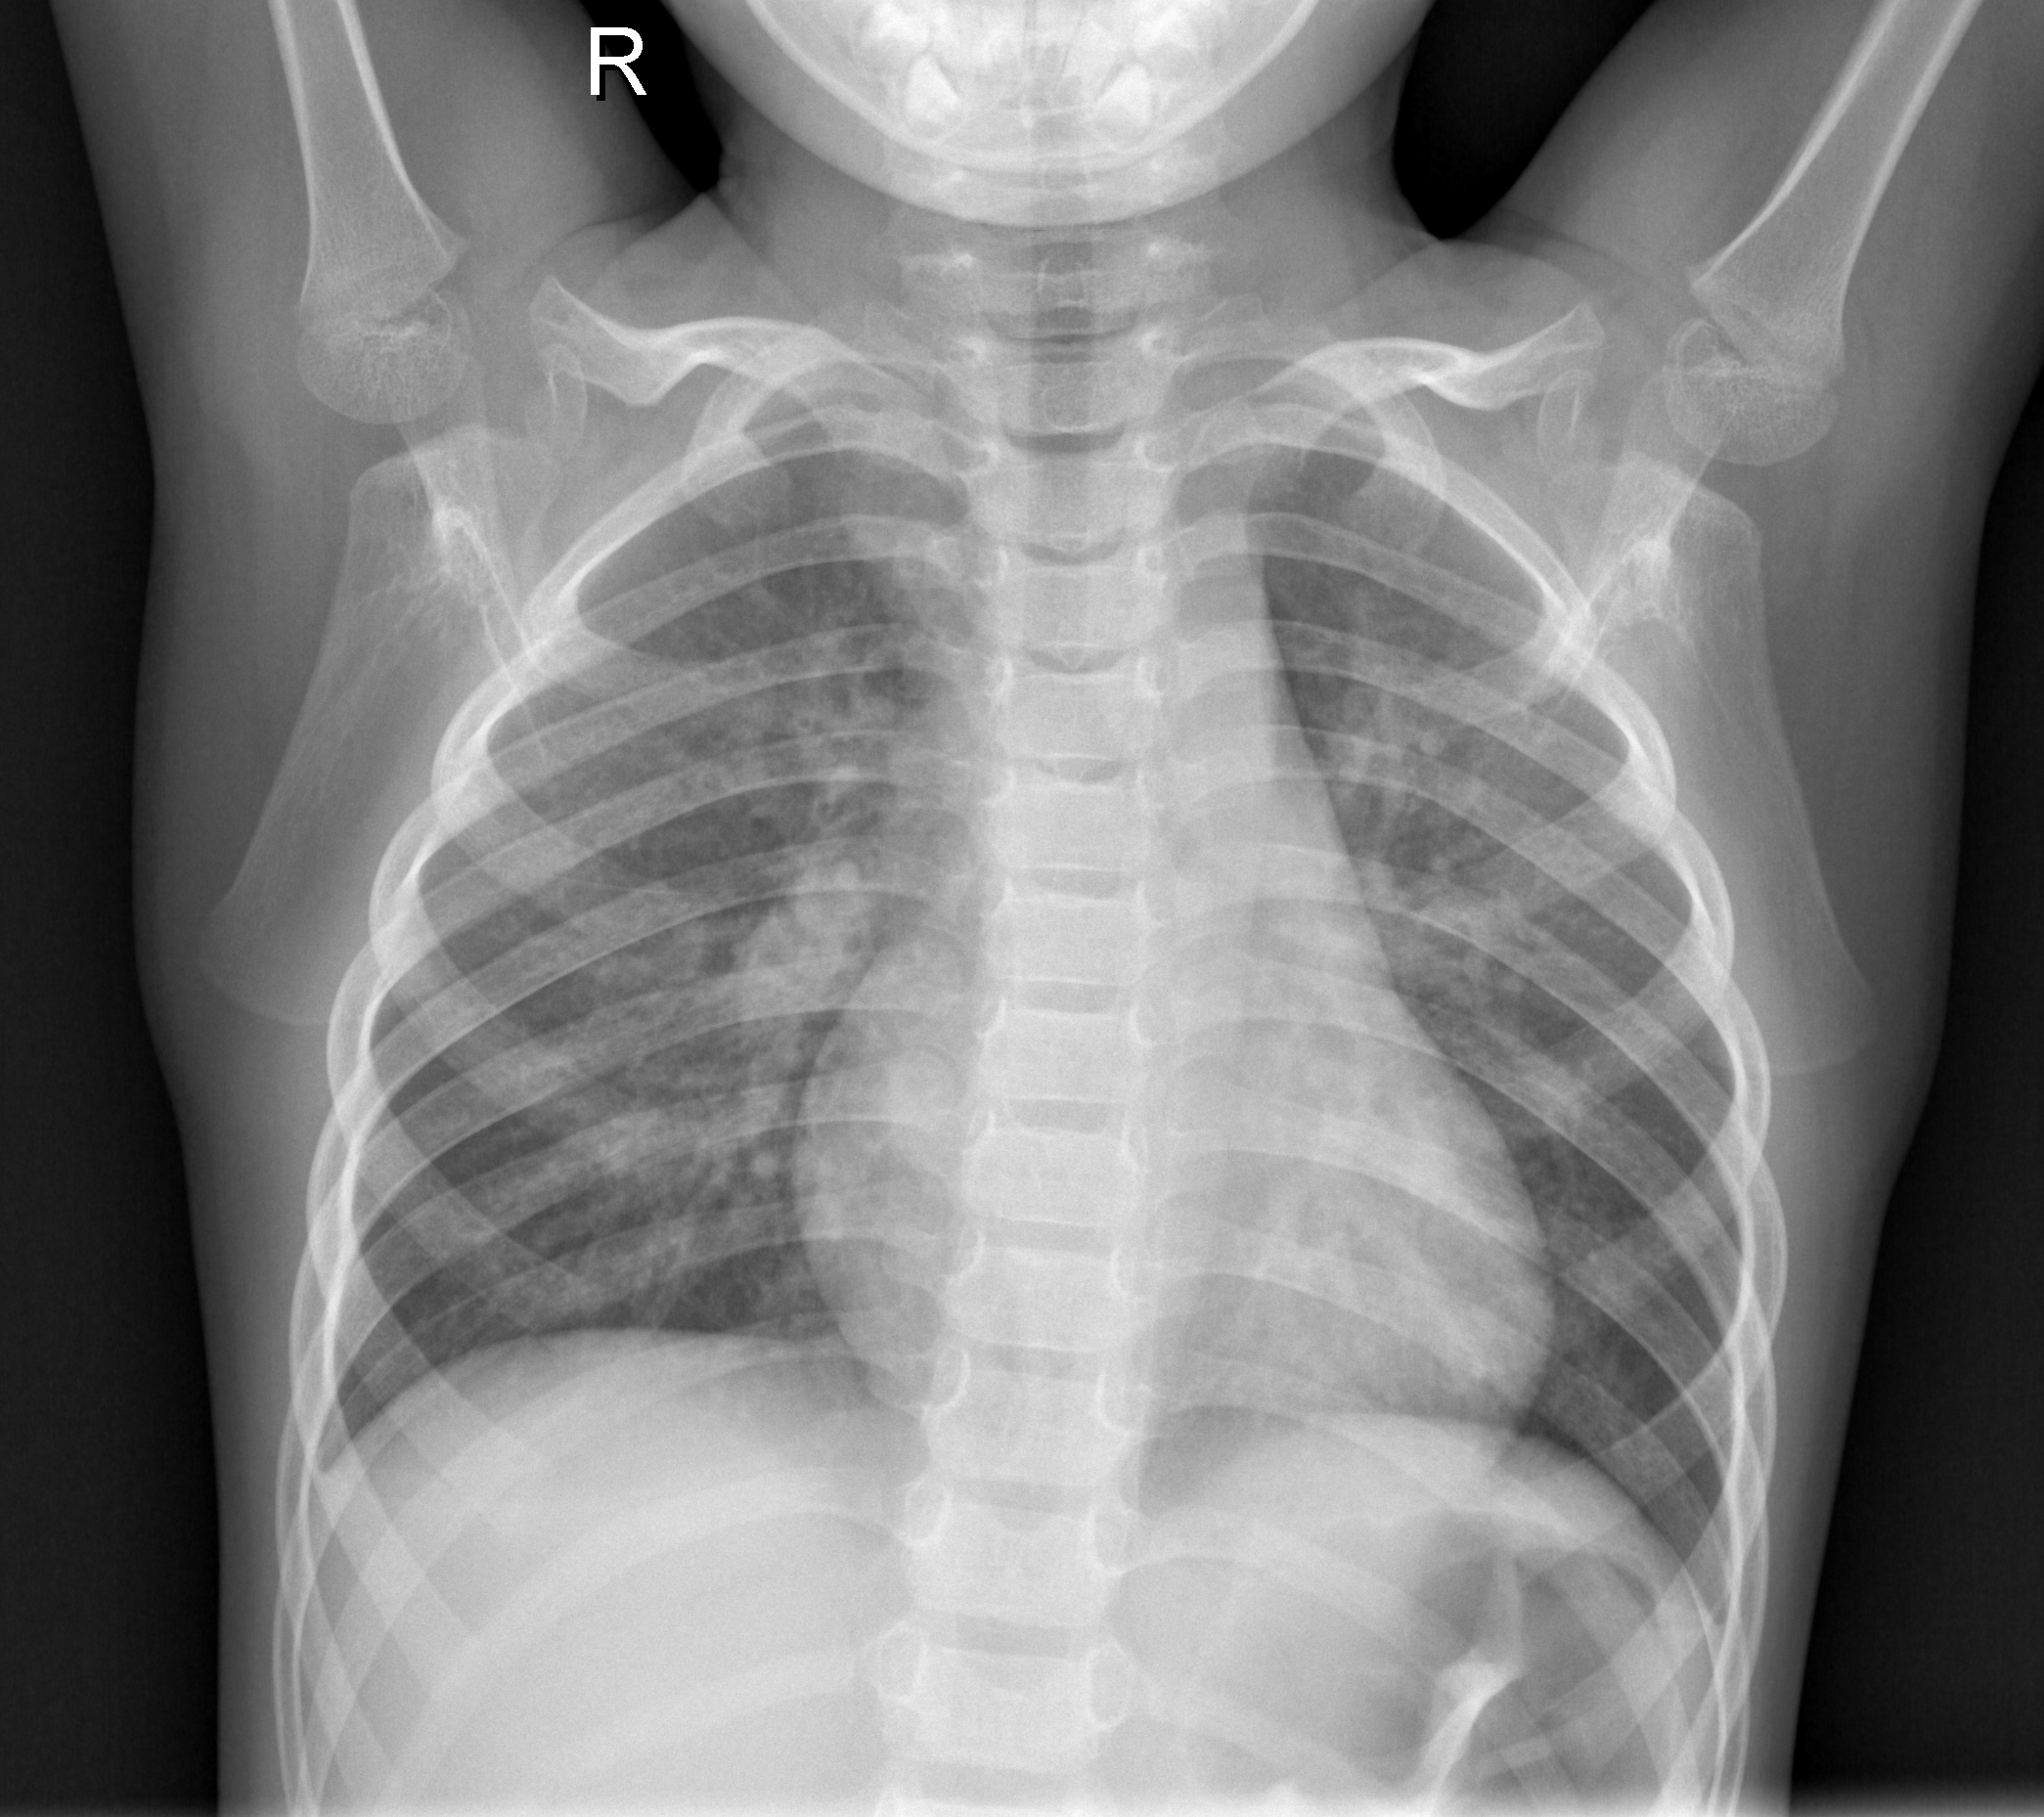

In [12]:
PIL.Image.open('/content/chest_xray/train/NORMAL/IM-0115-0001.jpeg')

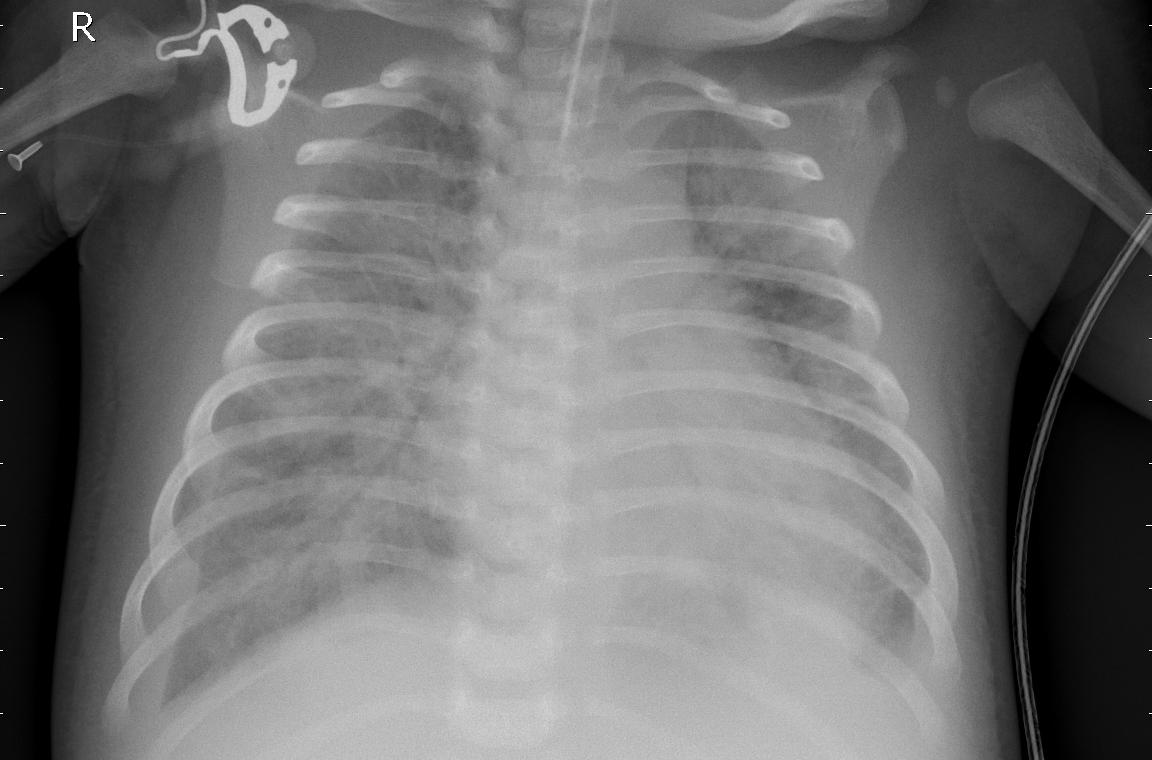

In [13]:
PIL.Image.open('/content/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg')

In [14]:
import tensorflow as tf

In [15]:
traning_ds =  tf.keras.utils.image_dataset_from_directory(
    '/content/chest_xray/train',

    image_size=(150, 150),
    batch_size=64,
    label_mode='categorical',
    shuffle=True,



)

Found 5216 files belonging to 2 classes.


In [16]:
test_ds =  tf.keras.utils.image_dataset_from_directory(
    '/content/chest_xray/test',

    image_size=(150, 150),
    batch_size=64,
    label_mode='categorical',
    shuffle=True,



)

Found 624 files belonging to 2 classes.


In [17]:
no_batch=tf.data.experimental.cardinality(test_ds)    # number of batches
Test_ds=test_ds.take(no_batch//5)  # take part for testing
val_ds=test_ds.skip(no_batch//5)   # take for valdation after make model

In [18]:
from tensorflow.python.data.ops.dataset_ops import AUTOTUNE
AUTOTUNE=tf.data.AUTOTUNE

training_ds = traning_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
Test_ds =Test_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds= val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [19]:
model = tf.keras.Sequential([


    tf.keras.layers.Dense(32, input_shape=(150,150,3), activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),

    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dropout(.25),

    tf.keras.layers.Dense(2, activation='softmax'),

])














In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150, 150, 32)      128       
                                                                 
 dense_1 (Dense)             (None, 150, 150, 64)      2112      
                                                                 
 dense_2 (Dense)             (None, 150, 150, 64)      4160      
                                                                 
 dense_3 (Dense)             (None, 150, 150, 128)     8320      
                                                                 
 dropout (Dropout)           (None, 150, 150, 128)     0         
                                                                 
 dense_4 (Dense)             (None, 150, 150, 128)     16512     
                                                                 
 dense_5 (Dense)             (None, 150, 150, 128)     1

In [22]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.0001),loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics='accuracy')

In [23]:
history=model.fit(traning_ds,epochs=15,validation_data=val_ds)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


82/82 [==============================] - 52s 530ms/step - loss: 9.7910 - accuracy: 0.7908 - val_loss: 0.3515 - val_accuracy: 0.8286
Epoch 2/15
82/82 [==============================] - 44s 507ms/step - loss: 0.2231 - accuracy: 0.9162 - val_loss: 0.3445 - val_accuracy: 0.8266
Epoch 3/15
82/82 [==============================] - 42s 482ms/step - loss: 0.2114 - accuracy: 0.9237 - val_loss: 0.8392 - val_accuracy: 0.6673
Epoch 4/15
82/82 [==============================] - 51s 588ms/step - loss: 0.1752 - accuracy: 0.9377 - val_loss: 0.6560 - val_accuracy: 0.7157
Epoch 5/15
82/82 [==============================] - 44s 498ms/step - loss: 0.1439 - accuracy: 0.9480 - val_loss: 0.9197 - val_accuracy: 0.7036
Epoch 6/15
82/82 [==============================] - 44s 500ms/step - loss: 0.2279 - accuracy: 0.9141 - val_loss: 0.5672 - val_accuracy: 0.7944
Epoch 7/15
82/82 [==============================] - 43s 492ms/step - loss: 0.2226 - accuracy: 0.9287 - val_loss: 0.4662 - val_accuracy: 0.7903
Epoch 8/15

In [24]:
import matplotlib.pyplot as plt

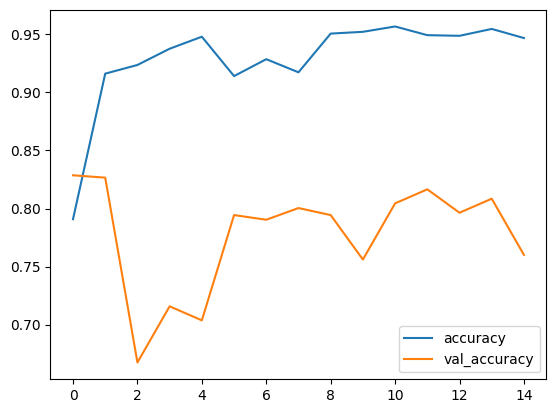

In [25]:
training_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(training_acc, label = 'accuracy')
plt.plot(val_acc, label = 'val_accuracy')
plt.legend()

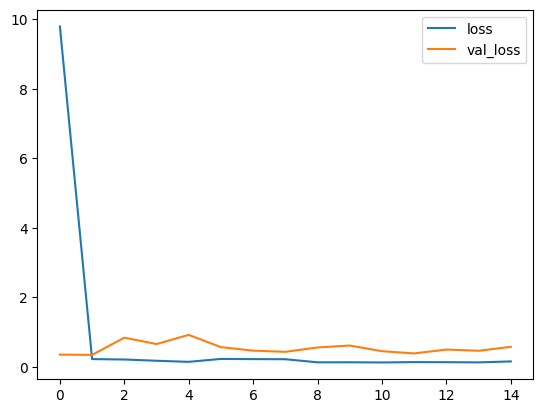

In [26]:
training_acc = history.history['loss']
val_acc = history.history['val_loss']

plt.plot(training_acc, label = 'loss')
plt.plot(val_acc, label = 'val_loss')
plt.legend()

In [27]:
train_loss, train_acc = model.evaluate(traning_ds)
test_loss, test_acc = model.evaluate(val_ds)

print("fianl train accuracy = {:.2f}, validation accuracy  = {:.2f}".format(train_acc*100, test_acc*100) )

8/8 [==============================] - 1s 176ms/step - loss: 0.5757 - accuracy: 0.7601
fianl train accuracy = 96.95, validation accuracy  = 76.01


In [1]:
model.save('model_pneu2.h5')

NameError: name 'model' is not defined

In [29]:
import numpy as np

In [30]:
emotion_dict = {0: "Normal", 1: "Pneumonia"}

(150, 150, 3)
1/1 [==============================] - 0s 276ms/step
[0.69742566, 0.3025743]
Normal


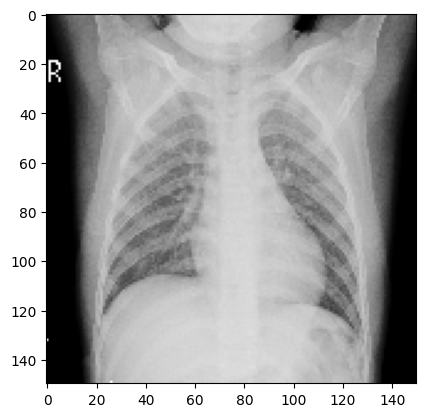

In [31]:
from keras.preprocessing import image

img = image.load_img("/content/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg",target_size = (150,150))
img = np.array(img)
plt.imshow(img)
print(img.shape) #prints (48,48) that is the shape of our image

img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,150,150,3)
result = model.predict(img)
result = list(result[0])
print(result)

img_index = result.index(max(result))
print(emotion_dict[img_index])
plt.show()

(150, 150, 3)
1/1 [==============================] - 0s 24ms/step
[0.022068143, 0.9779319]
Pneumonia


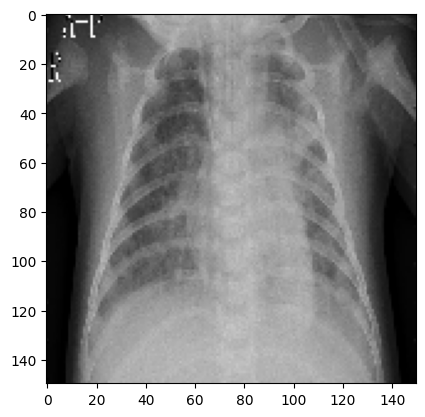

In [32]:
from keras.preprocessing import image

img = image.load_img("/content/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg",target_size = (150,150))
img = np.array(img)
plt.imshow(img)
print(img.shape) #prints (48,48) that is the shape of our image

img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,150,150,3)
result = model.predict(img)
result = list(result[0])
print(result)

img_index = result.index(max(result))
print(emotion_dict[img_index])
plt.show()

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns

In [34]:
# Extract labels from the dataset
test_labels = []
for _, label_batch in test_ds:
    test_labels.extend(tf.argmax(label_batch, axis=1))

# Convert labels to numpy array
test_labels = tf.stack(test_labels).numpy()

# Print the labels
print(test_labels)

[1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1
 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0
 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1
 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1
 0 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1
 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1
 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0
 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0
 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1
 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1
 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 1 1 0 1 1 0 1 0 1 1 1 

In [35]:
test_labels

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,

In [36]:
y_pred = model.predict(test_ds)

10/10 [==============================] - 4s 178ms/step


In [37]:
y_pred

array([[3.6658081e-01, 6.3341922e-01],
       [7.3755600e-02, 9.2624438e-01],
       [8.6777756e-04, 9.9913222e-01],
       ...,
       [8.7646013e-01, 1.2353987e-01],
       [5.9104305e-02, 9.4089568e-01],
       [7.6036522e-04, 9.9923968e-01]], dtype=float32)

In [38]:
y_pred = y_pred.tolist()

In [39]:
y_pred

[[0.3665808141231537, 0.6334192156791687],
 [0.07375559955835342, 0.9262443780899048],
 [0.0008677775622345507, 0.9991322159767151],
 [0.005882239434868097, 0.9941177368164062],
 [0.031198332086205482, 0.968801736831665],
 [0.00013946600665804, 0.9998605251312256],
 [0.032110948115587234, 0.9678890109062195],
 [0.009485112503170967, 0.990514874458313],
 [0.013799348846077919, 0.9862006306648254],
 [0.06943845003843307, 0.9305614829063416],
 [0.08220560103654861, 0.917794406414032],
 [0.027050303295254707, 0.9729496836662292],
 [0.05607825517654419, 0.9439217448234558],
 [0.006173273548483849, 0.993826687335968],
 [0.08398286998271942, 0.9160171151161194],
 [0.0005592672969214618, 0.9994407296180725],
 [0.035940323024988174, 0.9640596508979797],
 [0.035825107246637344, 0.9641749262809753],
 [0.004911284428089857, 0.9950887560844421],
 [0.05965499207377434, 0.9403449892997742],
 [0.00511179631575942, 0.9948882460594177],
 [0.0011332127032801509, 0.9988667964935303],
 [0.00162907387129962

In [40]:
result = []
for img in y_pred:
  img_index = img.index(max(img))
  result.append(img_index)


result

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,


In [41]:
y_pred = np.array(result)


In [42]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [43]:
accuracy = accuracy_score(y_pred, test_labels)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 57.37%


In [44]:
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

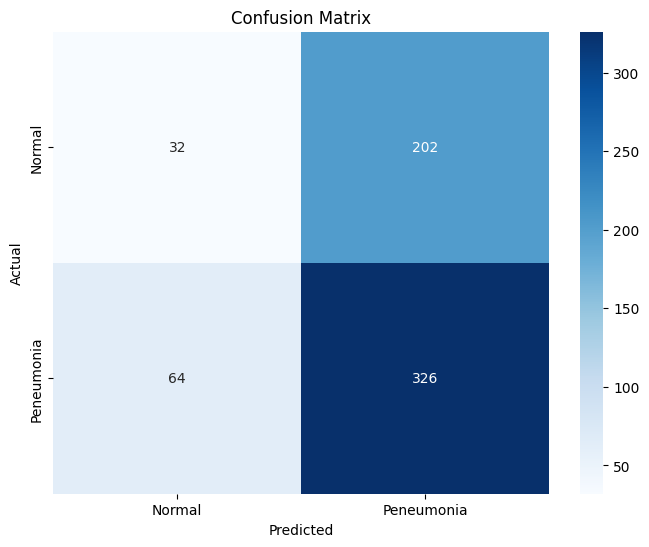

In [45]:
plot_confusion_matrix(test_labels, y_pred, class_names=["Normal", "Peneumonia"])

10/10 [==============================] - 4s 182ms/step


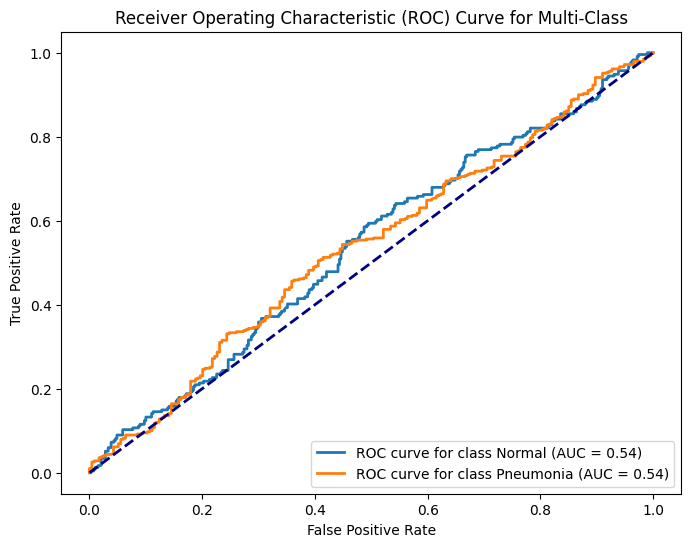

In [46]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import  roc_curve, auc

# Predict probabilities for each class
y_probs = model.predict(test_ds)
class_names=["Normal", "Pneumonia"]
# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(test_labels == i, y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve for class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class')
plt.legend(loc='lower right')
plt.show()

In [93]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,